In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [123]:
data=pd.read_csv("C:\\Users\\Dell Latitude 3410\\Downloads\\Mall_Customers.csv")

In [124]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Data Pre-Processing

In [126]:
len(data)

200

In [127]:
data_sample = data.sample(10)
data_sample.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
160,161,Female,56,79,35
170,171,Male,40,87,13
132,133,Female,25,72,34
59,60,Male,53,46,46


In [128]:
data.shape

(200, 5)

In [129]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [130]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [131]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [132]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [133]:
data['Gender'].nunique()

2

In [134]:
Gender = data['Gender'].value_counts().reset_index
Gender

<bound method Series.reset_index of Gender
Female    112
Male       88
Name: count, dtype: int64>

In [135]:
Age = data['Age'].value_counts().reset_index
Age

<bound method Series.reset_index of Age
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: count, dtype: int64>

In [136]:
data.values

array([[1, 'Male', 19, 15, 39],
       [2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6],
       [4, 'Female', 23, 16, 77],
       [5, 'Female', 31, 17, 40],
       [6, 'Female', 22, 17, 76],
       [7, 'Female', 35, 18, 6],
       [8, 'Female', 23, 18, 94],
       [9, 'Male', 64, 19, 3],
       [10, 'Female', 30, 19, 72],
       [11, 'Male', 67, 19, 14],
       [12, 'Female', 35, 19, 99],
       [13, 'Female', 58, 20, 15],
       [14, 'Female', 24, 20, 77],
       [15, 'Male', 37, 20, 13],
       [16, 'Male', 22, 20, 79],
       [17, 'Female', 35, 21, 35],
       [18, 'Male', 20, 21, 66],
       [19, 'Male', 52, 23, 29],
       [20, 'Female', 35, 23, 98],
       [21, 'Male', 35, 24, 35],
       [22, 'Male', 25, 24, 73],
       [23, 'Female', 46, 25, 5],
       [24, 'Male', 31, 25, 73],
       [25, 'Female', 54, 28, 14],
       [26, 'Male', 29, 28, 82],
       [27, 'Female', 45, 28, 32],
       [28, 'Male', 35, 28, 61],
       [29, 'Female', 40, 29, 31],
       [30, 'Female', 23

In [137]:
type(data)

pandas.core.frame.DataFrame

In [138]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [140]:
# Convert 'Age' column to numeric, coercing errors to NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')


In [141]:
# Check the data types after conversion
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


# Data Visualization

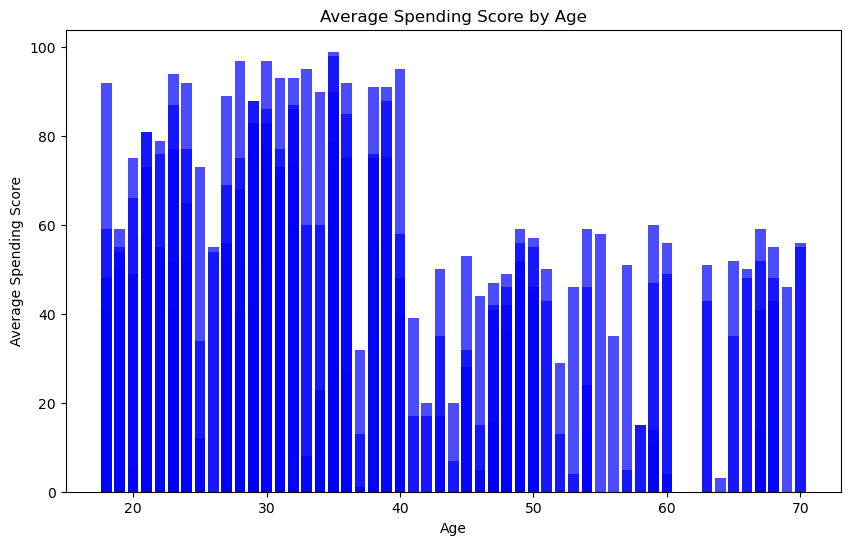

In [142]:
plt.figure(figsize=(10, 6))
plt.bar(data['Age'], data['Spending Score (1-100)'], color='blue', alpha=0.7)
plt.title("Average Spending Score by Age")
plt.xlabel("Age")
plt.ylabel("Average Spending Score")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


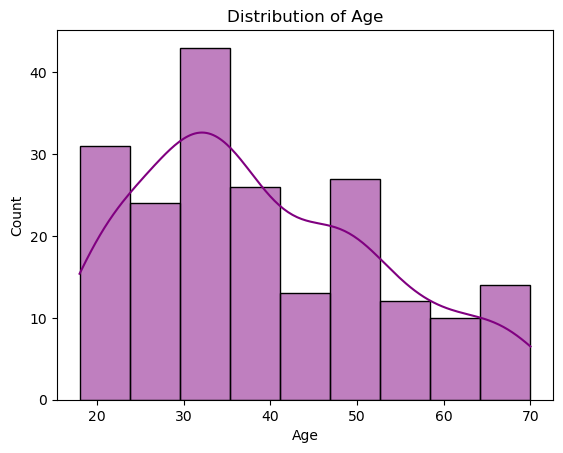

In [143]:
# Distribution of Age
sns.histplot(data['Age'], kde=True,color='purple')
plt.title('Distribution of Age')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


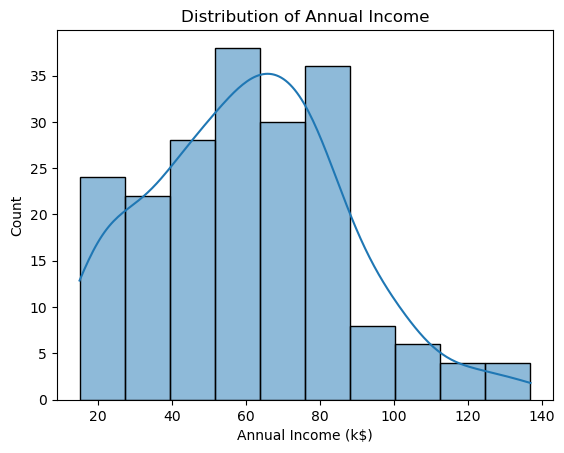

In [144]:
# Distribution of Annual Income
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


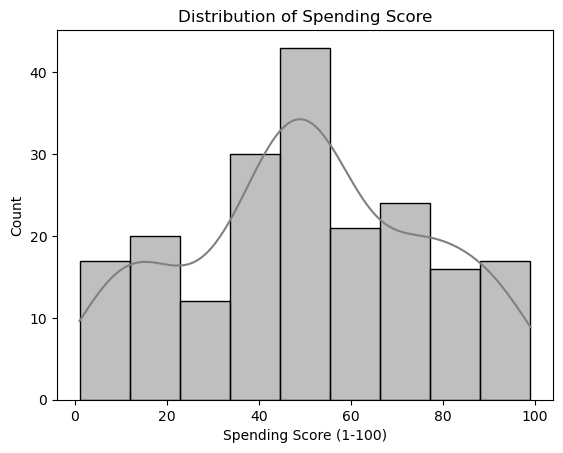

In [145]:
# Distribution of Spending Score
sns.histplot(data['Spending Score (1-100)'], kde=True,color='grey')
plt.title('Distribution of Spending Score')
plt.show()

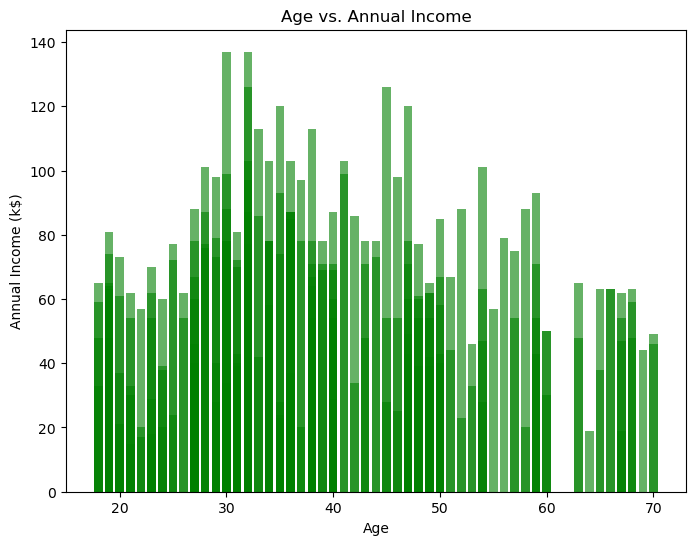

In [146]:
# Example of plotting Age vs. Annual Income using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(data['Age'], data['Annual Income (k$)'], color='green', alpha=0.6)
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

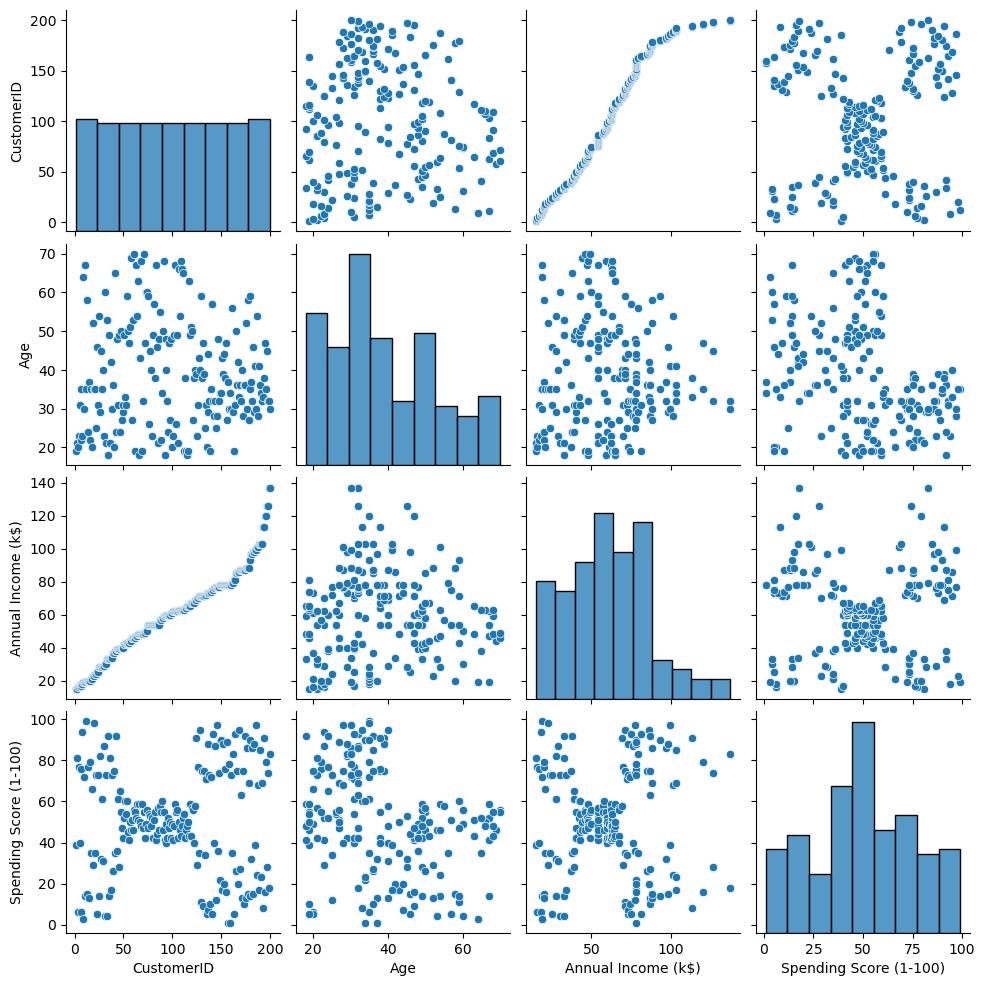

In [147]:
sns.pairplot(data)
plt.show()

# Statistical Analysis

In [148]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [149]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [150]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [151]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [152]:
# Label Encoding
data['Gender_Label'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [153]:
data = pd.get_dummies(data, columns=['Gender'])

In [154]:
print(data)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_Label  Gender_Female  Gender_Male  
0               0          False         True  
1               0          False         True  
2               1           True       

# Model Development

In [155]:
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

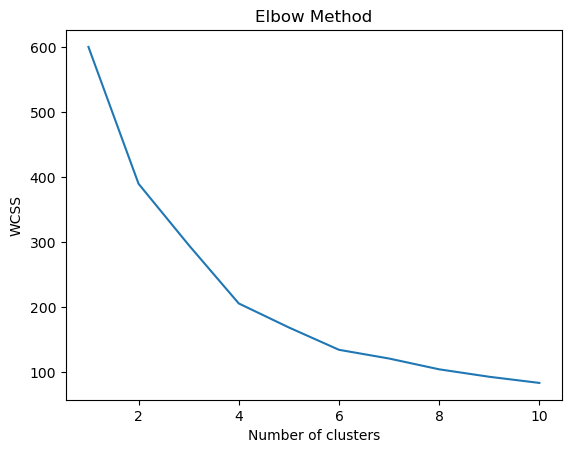

In [156]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [157]:
# Applying K-Means to the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original data
data['Cluster'] = clusters


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [158]:
# Applying PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [159]:
pca_data= pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])
pca_data['Cluster'] = clusters


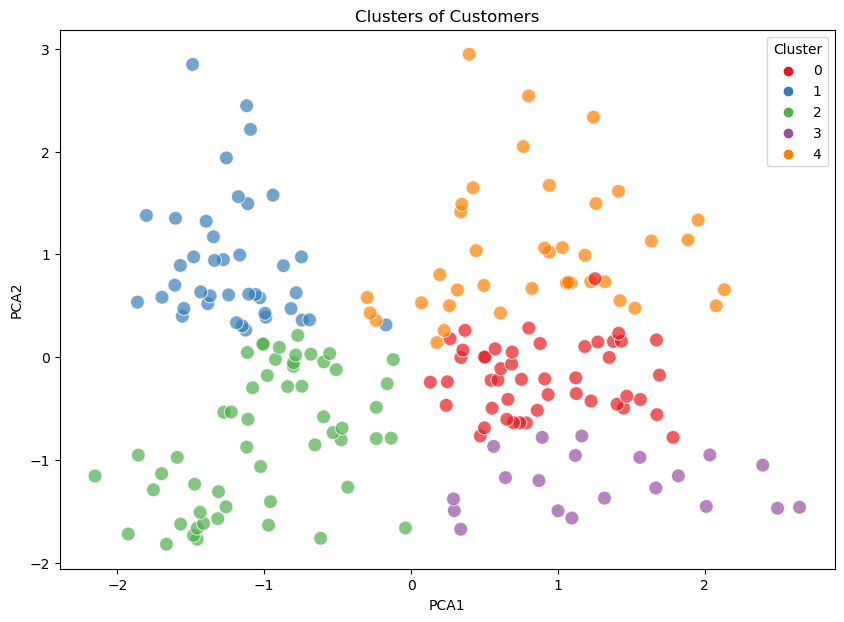

In [160]:
# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_data, palette='Set1', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.show()

In [161]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         83.872340  55.638298           54.382979               48.851064   
1        161.025000  32.875000           86.100000               81.525000   
2         55.648148  25.185185           41.092593               62.240741   
3         24.100000  46.250000           26.750000               18.350000   
4        159.743590  39.871795           86.102564               19.358974   

         Gender_Label  Gender_Female  Gender_Male  
Cluster                                            
0            0.574468       0.574468     0.425532  
1            0.550000       0.550000     0.450000  
2            0.592593       0.592593     0.407407  
3            0.600000       0.600000     0.400000  
4            0.487179       0.487179     0.512821  


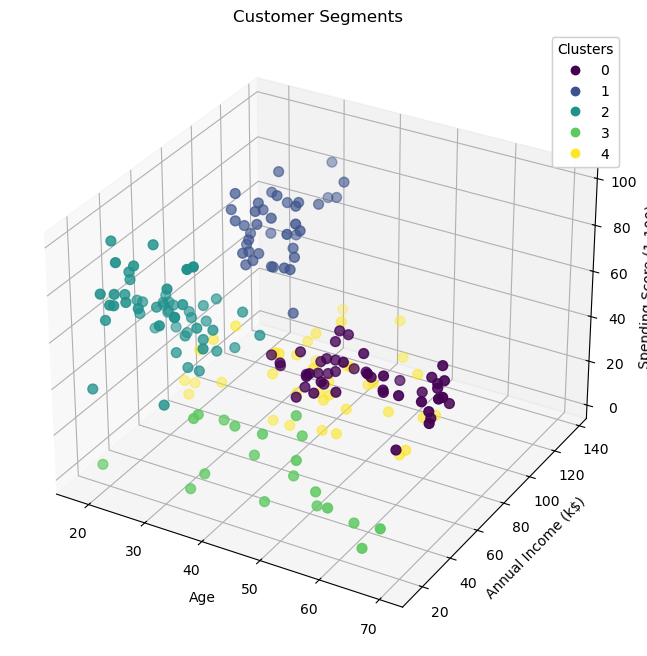

In [162]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the scatter plot
scatter = ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                     c=data['Cluster'], cmap='viridis', s=50)

# Add labels and title
ax.set_title('Customer Segments')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

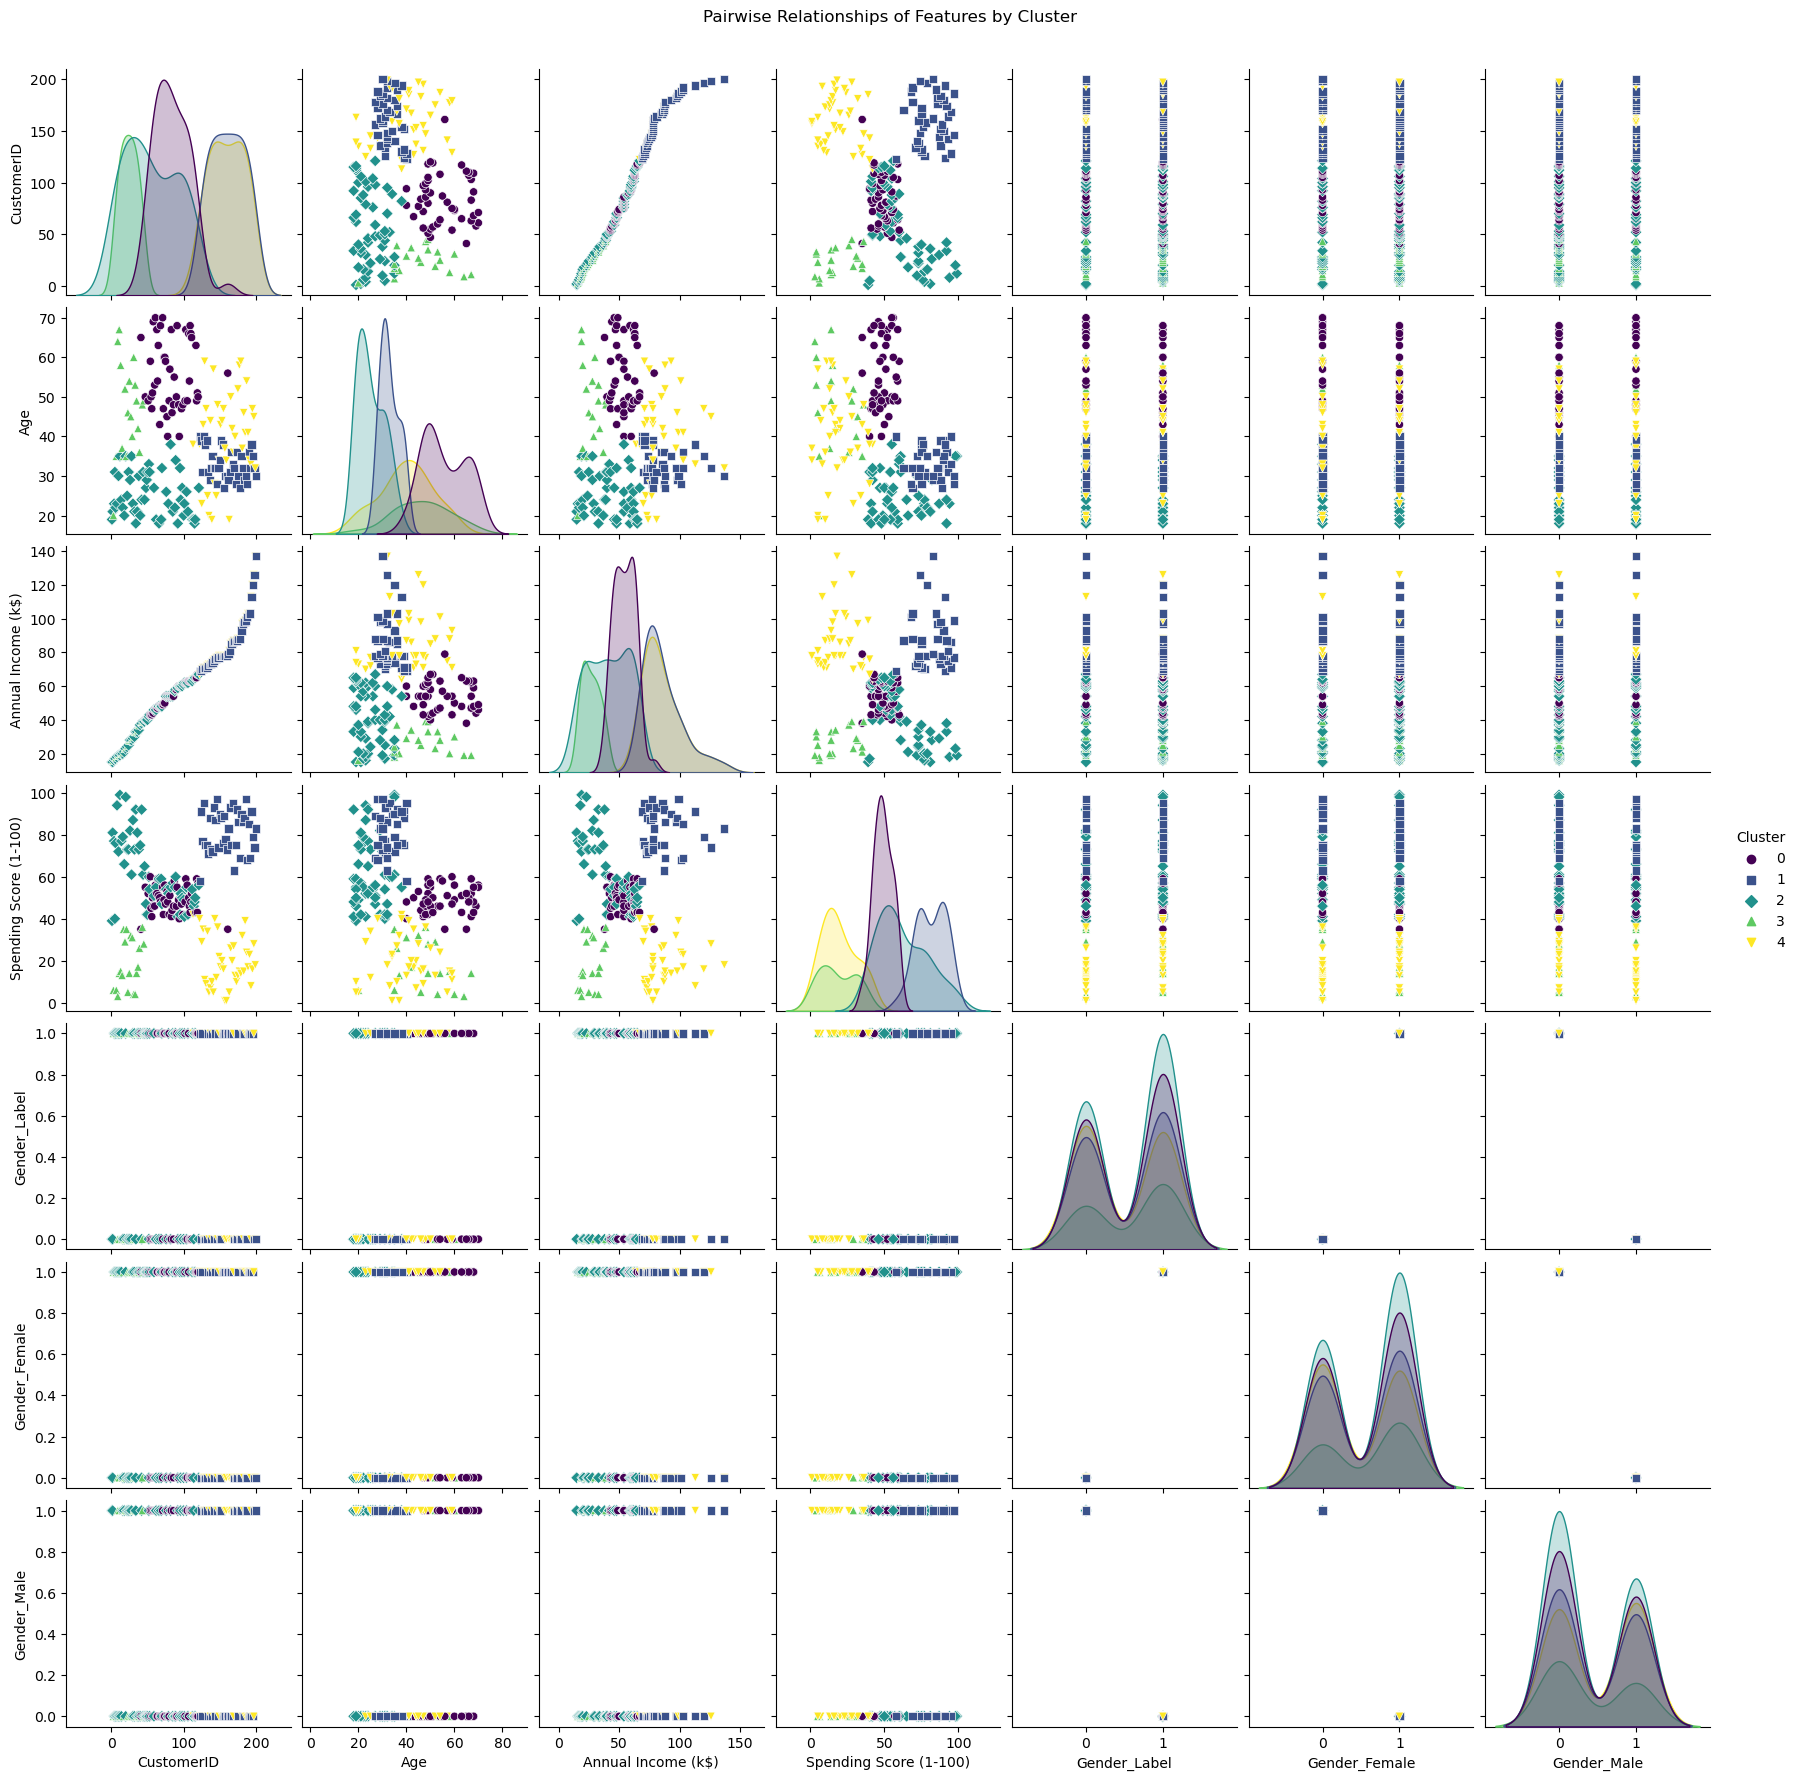

In [163]:
sns.pairplot(data, hue='Cluster', palette='viridis', markers=['o', 's', 'D', '^', 'v'])
plt.suptitle('Pairwise Relationships of Features by Cluster', y=1.02)
plt.show()



Text(0.5, 1.0, 'Age Distribution by Cluster')

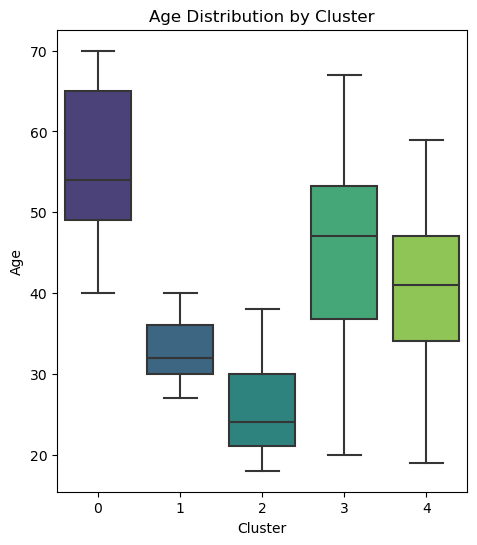

In [164]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Age', data=data, palette='viridis')
plt.title('Age Distribution by Cluster')


Text(0.5, 1.0, 'Annual Income Distribution by Cluster')

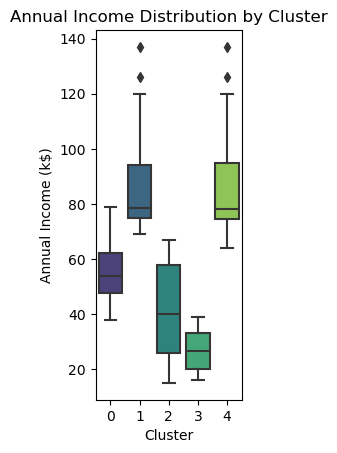

In [165]:
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='viridis')
plt.title('Annual Income Distribution by Cluster')


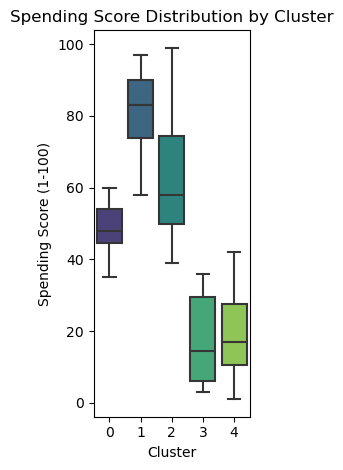

In [166]:
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='viridis')
plt.title('Spending Score Distribution by Cluster')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Age by Cluster')

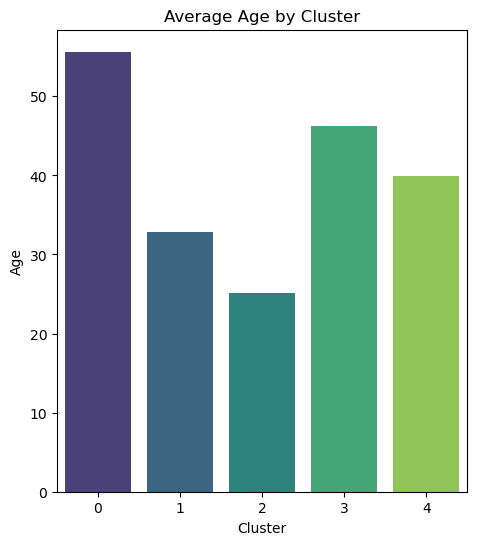

In [167]:
cluster_analysis = data.groupby('Cluster').mean().reset_index()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='Cluster', y='Age', data=cluster_analysis, palette='viridis')
plt.title('Average Age by Cluster')

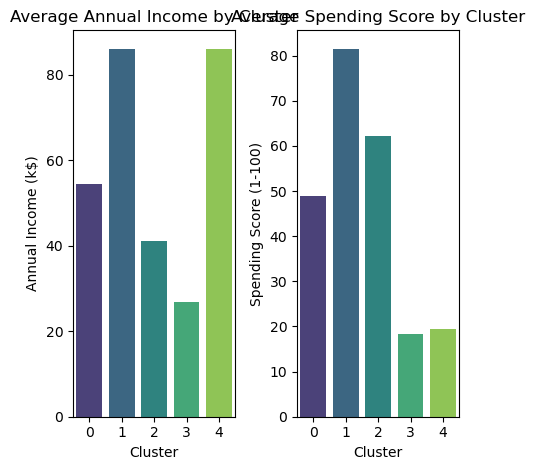

In [168]:
plt.subplot(1, 3, 2)
sns.barplot(x='Cluster', y='Annual Income (k$)', data=cluster_analysis, palette='viridis')
plt.title('Average Annual Income by Cluster')

plt.subplot(1, 3, 3)
sns.barplot(x='Cluster', y='Spending Score (1-100)', data=cluster_analysis, palette='viridis')
plt.title('Average Spending Score by Cluster')

plt.tight_layout()
plt.show()